In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

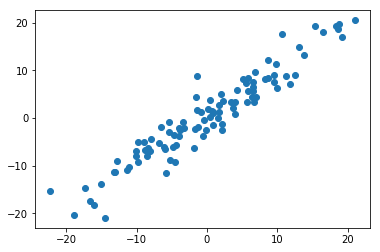

In [2]:
X = torch.randn(100, 1) * 10
y = X + torch.randn(100, 1) * 3
plt.plot(X.numpy(), y.numpy(), 'o')

In [3]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [4]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
[w, b] = model.parameters()
def get_params():
    return (w[0][0].item(), b[0].item())

In [6]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 +b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()
    

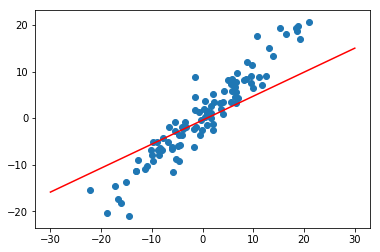

In [7]:
plot_fit('Initial Model')

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [9]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print('epoch: ', i+1, "loss: ", loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1 loss:  24.959264755249023
epoch:  2 loss:  16.865570068359375
epoch:  3 loss:  12.753350257873535
epoch:  4 loss:  10.65747356414795
epoch:  5 loss:  9.582995414733887
epoch:  6 loss:  9.02617073059082
epoch:  7 loss:  8.73193359375
epoch:  8 loss:  8.571128845214844
epoch:  9 loss:  8.478348731994629
epoch:  10 loss:  8.420456886291504
epoch:  11 loss:  8.38066291809082
epoch:  12 loss:  8.350445747375488
epoch:  13 loss:  8.32547664642334
epoch:  14 loss:  8.303545951843262
epoch:  15 loss:  8.283523559570312
epoch:  16 loss:  8.26481819152832
epoch:  17 loss:  8.24712085723877
epoch:  18 loss:  8.23025894165039
epoch:  19 loss:  8.214132308959961
epoch:  20 loss:  8.198678970336914
epoch:  21 loss:  8.183855056762695
epoch:  22 loss:  8.16962718963623
epoch:  23 loss:  8.155966758728027
epoch:  24 loss:  8.142849922180176
epoch:  25 loss:  8.130253791809082
epoch:  26 loss:  8.118156433105469
epoch:  27 loss:  8.106538772583008
epoch:  28 loss:  8.095380783081055
epoch:  2

Text(0.5, 0, 'epochs')

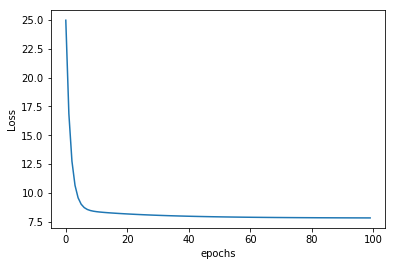

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

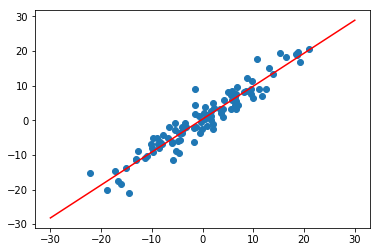

In [11]:
plot_fit("trained")